In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('/kaggle/input/regdata/Real estate.csv')
#to see what my dataset is comprised of
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
print(dataset.dtypes)

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [4]:
print(dataset.isnull().any())

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool


In [5]:
#dropping the id and date column
dataset = dataset.drop(['No'], axis = 1)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your X columns and Y output
data = pd.DataFrame({'X1': dataset['X1 transaction date'], 
                     'X2': dataset['X2 house age'], 
                     'X3': dataset['X3 distance to the nearest MRT station'], 
                     'X4': dataset['X4 number of convenience stores'], 
                     'X5': dataset['X5 latitude'],
                     'X6': dataset['X6 longitude'],
                     'Y': dataset['Y house price of unit area']
                    })

# Anova table, F-test, T-test, VIF

In [7]:
# Fit the ordinary least squares (OLS) model
model = ols('Y~ X1+X2+X3+X4+X5+X6', data=data).fit()

# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)
print()
# Perform F-test
f_test = model.f_test("X1 = X2 = X3 = X4 = X5 = X6 = 0")
print(f_test)
print()
# Perform T-test
t_test = model.t_test("X1 = 0")
print(t_test)
print()
# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
vif["VIF"] = [variance_inflation_factor(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].values, i) for i in range(6)]
print(vif)

             df        sum_sq       mean_sq           F        PR(>F)
X1          1.0    585.281736    585.281736    7.459780  6.583672e-03
X2          1.0   3440.860324   3440.860324   43.855908  1.120227e-10
X3          1.0  34856.936665  34856.936665  444.273373  3.315346e-67
X4          1.0   3575.719388   3575.719388   45.574771  5.079502e-11
X5          1.0   2064.917772   2064.917772   26.318663  4.489523e-07
X6          1.0      5.130778      5.130778    0.065395  7.982928e-01
Residual  407.0  31932.530922     78.458307         NaN           NaN

<F test: F=94.5912769936064, p=4.863558688550803e-74, df_denom=407, df_num=6>

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.1462      1.557      3.305      0.001       2.085       8.207

  Variable           VIF
0       X1  4.2533

In [9]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area'  ]],
                     hue='Y house price of unit area', palette='tab20',height=6) 
g.set(xticklabels=[]);

In [11]:
#separating independent and dependent variable
X = dataset.iloc[:,:6].values
y = dataset.iloc[:,6].values
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [13]:
print(y_pred)

[40.87811266 12.56646611 42.54990116 12.3979175  43.12062788 40.09320113
 40.80009517 34.57081547 49.77913902 46.47046629 46.06952221 40.76924262
 40.28476746 40.29724432 47.67572246 38.74755077 40.37031959 41.88184196
 41.15469513 42.86461775 50.11115583 31.14656097 40.56556864 46.25115789
 46.75877961 43.70537213 46.55533351 26.60141762 48.76042236 21.59439122
 44.82442924 35.33618117 43.45552574 39.15611041 44.25004041 32.31235943
 48.09849406 40.21985603 53.08548878  7.31841346 52.67406499 33.86202343
 34.69426506 50.01976217 14.99254492 43.31460482 42.98867354 12.73772855
 34.23232491 48.47931372 53.96045439 39.32493637 48.24680065 25.46988969
 30.76348034 34.75866859 49.57115497 41.12713922 43.73792528 33.40909508
 44.27830477 44.0277985  40.29816151 47.50014974 37.19006435 30.20600884
  9.48887973 35.39478373 46.91395869 40.09320113 31.54671722 46.83333627
 45.31300395 31.04587198 41.38057894 36.3850842  31.40127425 12.90099429
 47.80003698 45.54192937 47.43079133 29.21795158 43

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.119058190432006
Mean Squared Error: 69.91357163430592
Root Mean Squared Error: 8.361433587268747


In [15]:
from sklearn.metrics import r2_score

print("R2-score: %.2f (RMSE):" , r2_score(y_test, y_pred) )

R2-score: %.2f (RMSE): 0.5826428104650488


R-squared (R2) Score: 0.582642810465049
Adjusted R-squared (R2) Score: 0.5764901246242389


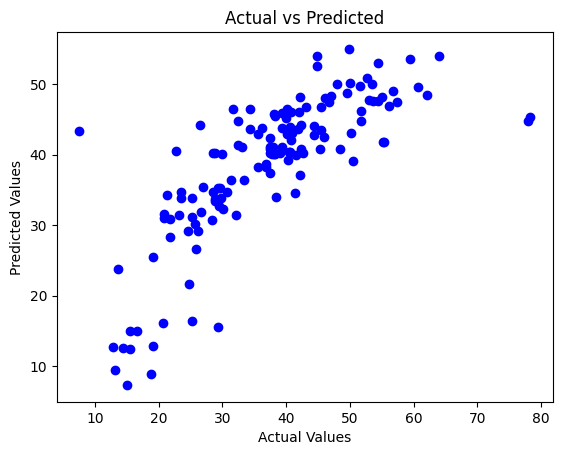

In [16]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



# Calculating R-squared and adjusted R-squared
SS_Residual = sum((y_test-y_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(f"R-squared (R2) Score: {r_squared}")
print(f"Adjusted R-squared (R2) Score: {adjusted_r_squared}")


plt.show()


## Hypothesis Testing

### Performing t-test for each of the feature and keeping ones having p value less than 0.05 along and checking for vif values of each of the features and then keeping the ones having values less than 10.

In [23]:
X = dataset.drop('Y house price of unit area', axis=1)
y = dataset['Y house price of unit area']
p_values = []
vif_values = []

In [24]:
for column in X.columns:
    # Fit the OLS model
    model = sm.OLS(y, sm.add_constant(X[[column]])).fit()
    
    # Perform t-test
    t_test = model.t_test(f"{column} = 0")
    p_value = t_test.pvalue.item()
    p_values.append(p_value)
    
    # Calculate VIF
    vif = variance_inflation_factor(sm.add_constant(X).values, X.columns.get_loc(column))
    vif_values.append(vif)
    
    print(f"{column}: VIF = {vif}, p-value = {p_value}")

# Combine results into a DataFrame
results = pd.DataFrame({
    'Variable': X.columns,
    'P-value': p_values,
    'VIF': vif_values
})

# Select features based on significance levels and VIF
selected_features = results[(results['P-value'] < 0.05) & (results['VIF'] < 10)]['Variable'].tolist()

# Print the selected features
print("Selected Features:", selected_features)

X1 transaction date: VIF = 242251225.36256373, p-value = 0.07537113327393255
X2 house age: VIF = 1.0146736235676823, p-value = 1.5604255047970216e-05
X3 distance to the nearest MRT station: VIF = 1.014286764810501, p-value = 4.639825030362145e-56
X4 number of convenience stores: VIF = 4.3230194690341435, p-value = 3.4134833404963085e-37
X5 latitude: VIF = 1.617037748505609, p-value = 1.3877612957734833e-33
X6 longitude: VIF = 1.6102343933413, p-value = 1.7651906040549444e-30
Selected Features: ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


In [25]:
X_selected = dataset[selected_features]
y = dataset['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

R-squared (R2) Score: 0.6746481382828152
Adjusted R-squared (R2) Score: 0.6698517963410385


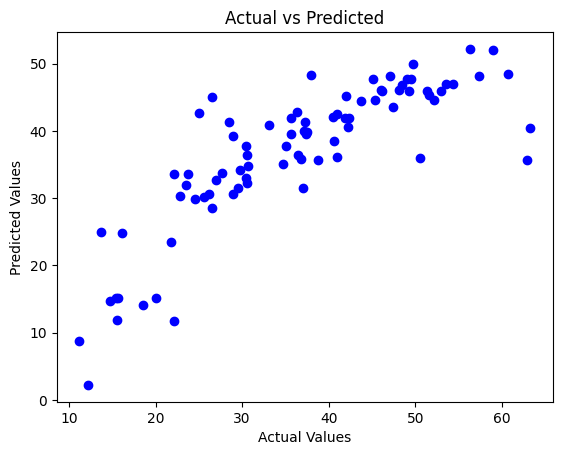

In [26]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



# Calculating R-squared and adjusted R-squared
SS_Residual = sum((y_test-y_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(f"R-squared (R2) Score: {r_squared}")
print(f"Adjusted R-squared (R2) Score: {adjusted_r_squared}")


plt.show()
